# A/B testing: conversion rate

Loading data from disk

In [9]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("cleaned_data.csv")


## 1. Conversion rate of two groups


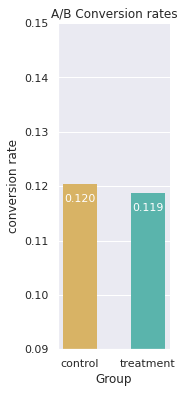

In [11]:
agg = df[["converted", "group"]].groupby("group").aggregate(["mean", "size", "sum"])
agg.columns = ["conv_rate", "size", "count"]

# plotting
fig = plt.figure(figsize=(2, 6))
rects = plt.bar(x=agg.index, 
                height=agg["conv_rate"], 
                width=[0.5, 0.5],
                color=["#d8b365", "#5ab4ac"], edgecolor=(0, 0, 0, 0))
# customizing plot
plt.grid(False)
plt.grid(axis='y', color="white")
plt.ylim(0.09, 0.15);
plt.xlabel("Group")
plt.ylabel("conversion rate");
plt.title("A/B Conversion rates")
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=True) # labels along the bottom edge are off
ax.set_axisbelow(True)

# text on bars
for i in [0, 1]:
    height = rects[i].get_height()
    plt.annotate("{:.3f}".format(agg.iloc[i]["conv_rate"]), 
                 xy=(rects[i].get_x() + rects[i].get_width() / 2, height-0.004),
                 xytext=(0, 2),
                 fontsize=11,
                 textcoords="offset points",
                 ha='center', 
                 va='bottom', 
                 color="white")
    

## 2. Time Series

In [10]:
df["day"] = pd.to_datetime(df["timestamp"]).dt.day

conv_days = (df[["day", "group", "converted"]]
              .groupby(["group", "day"])
              .agg(["mean", "size"])
             )
conv_days.columns = ["conv_rate", "size"]
control_days = conv_days.loc["control"]
treatment_days = conv_days.loc["treatment"]
conv_days.head()

conv_rate  size
group   day                 
control 2     0.125568  2859
        3     0.113809  6590
        4     0.121922  6578
        5     0.123230  6427
        6     0.115350  6606

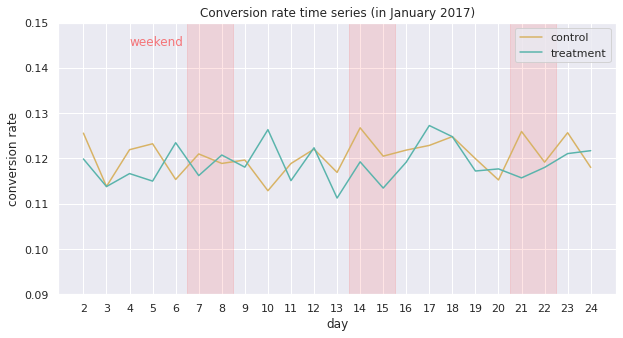

In [11]:
fig = plt.figure(figsize=(10, 5))
sns.set_theme()
plt.plot(control_days.index, control_days["conv_rate"], label="control", color="#d8b365")
plt.plot(treatment_days.index, treatment_days["conv_rate"], label="treatment", color= "#5ab4ac")
plt.xticks(control_days.index)
plt.ylim(0.09, 0.15)
plt.xlabel("day")
plt.ylabel("conversion rate")
plt.title("Conversion rate time series (in January 2017)")
ax=plt.gca()

for weekend in [6.5, 8.5], [13.5, 15.5], [20.5, 22.5]:
    ax.fill_between(weekend, [1, 1], 
                color='red', alpha=0.1)
    
plt.text(4, 0.145, "weekend", fontsize=12, color="red", alpha=0.5)

plt.legend();

We suspect increasing of CR of control group and decresing CR of treatment group in 14 and 15 January (Saturday and Sunday).

By days of week:

## 3. Conversion rate on days of week

In [12]:
df["day"] = pd.to_datetime(df["timestamp"]).dt.dayofweek

conv_days = (df[["day", "group", "converted"]]
              .groupby(["group", "day"])
              .agg(["mean", "size"])
             )

conv_days.columns = ["conv_rate", "size"]
conv_days.reset_index(inplace=True)



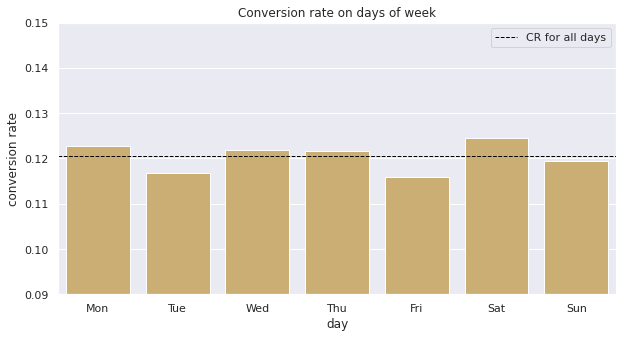

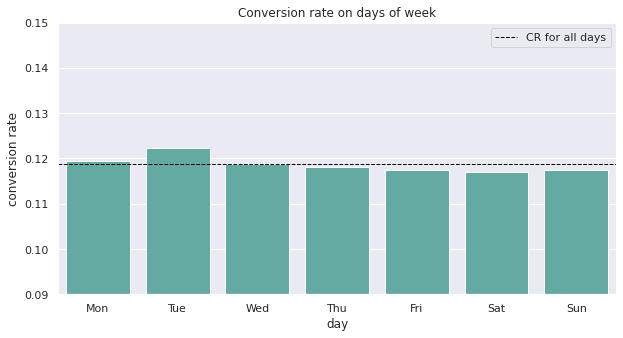

In [10]:

def plot_cr_days(group_name):
    data = conv_days[conv_days["group"]==group_name]
    mean_cr = data["conv_rate"].mean() 
    
    fig = plt.figure(figsize=(10, 5))
    plt.axhline(mean_cr, 
                color="black", 
                linestyle="--", 
                linewidth=1, 
                label="CR for all days")

    color = "#d8b365" if (group_name == "control") else "#5ab4ac"
    sns.barplot(x="day", y="conv_rate",
                data=data, 
                color=color)
    plt.grid(axis="y", color="white")
    ax = plt.gca()
    ax.set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
    ax.set_axisbelow(True)
    plt.ylim(0.09, 0.15)

    plt.title("Conversion rate on days of week")
    plt.ylabel("conversion rate")
    plt.legend()
    plt.show()

    
plot_cr_days("control")
plot_cr_days("treatment")

## 4. Plot with CI

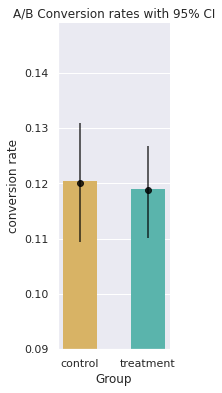

In [38]:
# plotting
fig = plt.figure(figsize=(2, 6))
rects = plt.bar(x=agg.index, 
                height=agg["conv_rate"], 
                width=[0.5, 0.5],
                color=["#d8b365", "#5ab4ac"], edgecolor=(0, 0, 0, 0))
# customizing plot
plt.grid(False)
plt.grid(axis='y', color="white")
plt.ylim(0.09, 0.149);
plt.xlabel("Group")
plt.ylabel("conversion rate");
plt.title("A/B Conversion rates with 95% CI")
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_axisbelow(True)


plt.errorbar(x=[0, 1], y=[0.120, 0.1188], yerr=[(0.120-0.1095, 0.1286-0.120), (0.1188-0.1078, 0.1267-0.1188)
], color='black', alpha=0.8, fmt='o')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=True) # labels along the bottom edge are off